<a href="https://colab.research.google.com/github/KODURISRIHARI/Emotion_Detection_/blob/main/Emotion_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Changed the mount point to '/content/drive'

Mounted at /content/drive


In [ ]:
train_path = "/content/drive/MyDrive/Emotion_detection_project_folder/train.txt"
val_path = "/content/drive/MyDrive/Emotion_detection_project_folder/val.txt"
test_path = "/content/drive/MyDrive/Emotion_detection_project_folder/test.txt"

In [ ]:
def load_data(file_path):
    data = pd.read_csv(file_path, sep=';', header=None, names=['text', 'emotion'])
    return data

In [ ]:
train_data = load_data(train_path)
val_data = load_data(val_path)
test_data = load_data(test_path)

In [ ]:
print(train_data.head())
print("____")
print(val_data.head())
print("____")
print(test_data.head())

                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
____
                                                text  emotion
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy
____
                                                text  emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadnes

In [ ]:
print(train_data.shape)
print("____")
print(val_data.shape)
print("____")
print(test_data.shape)

(16000, 2)
____
(2000, 2)
____
(2000, 2)


In [ ]:
# Preprocessing
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['text'])

In [ ]:
# Tokenize and pad sequences
def preprocess_text(data, tokenizer, max_length=50):
    sequences = tokenizer.texts_to_sequences(data['text'])
    padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
    return padded

train_sequences = preprocess_text(train_data, tokenizer)
val_sequences = preprocess_text(val_data, tokenizer)
test_sequences = preprocess_text(test_data, tokenizer)


In [ ]:
print(train_sequences)
print(train_sequences.shape)

[[   2  139    3 ...    0    0    0]
 [   2   40  101 ...    0    0    0]
 [  17 3060    7 ...    0    0    0]
 ...
 [   2    3  327 ...    0    0    0]
 [   2    3   14 ...    0    0    0]
 [   2   47    7 ...    0    0    0]]
(16000, 50)


***it will add padding to all sequences of records to make them of same length which will be individually equal***

In [ ]:
df = pd.DataFrame(train_sequences)
print(df.iloc[:5,0:15])
print(df.iloc[:5,16:32])
print(df.iloc[:5,33:50])

   0     1    2     3    4    5    6     7    8     9    10  11  12  13   14
0   2   139    3   679    0    0    0     0    0     0    0   0   0   0    0
1   2    40  101    60    8   15  494     5   15  3496  553  32  60  61  128
2  17  3060    7  1149    5  286    2     3  495   438    0   0   0   0    0
3   2    24  165     8  665   27    6  4158    2    59   47   9  13  22   72
4   2    24    8  1065    0    0    0     0    0     0    0   0   0   0    0
   16    17  18  19    20  21  22  23  24  25  26  27  28  29  30  31
0   0     0   0   0     0   0   0   0   0   0   0   0   0   0   0   0
1  76  1480   4  22  1255   0   0   0   0   0   0   0   0   0   0   0
2   0     0   0   0     0   0   0   0   0   0   0   0   0   0   0   0
3   6  3497   0   0     0   0   0   0   0   0   0   0   0   0   0   0
4   0     0   0   0     0   0   0   0   0   0   0   0   0   0   0   0
   33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['emotion'])
val_labels = label_encoder.transform(val_data['emotion'])
test_labels = label_encoder.transform(test_data['emotion'])


In [ ]:
print(train_labels)
print(train_labels.shape)
print(val_labels)
print(val_labels.shape)
print(test_labels)
print(test_labels.shape)
print(np.unique(train_labels))

[4 4 0 ... 2 0 4]
(16000,)
[4 4 3 ... 2 2 2]
(2000,)
[4 4 4 ... 2 2 1]
(2000,)
[0 1 2 3 4 5]


In [ ]:
# Convert labels to categorical
num_classes = len(label_encoder.classes_)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
print(train_labels)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


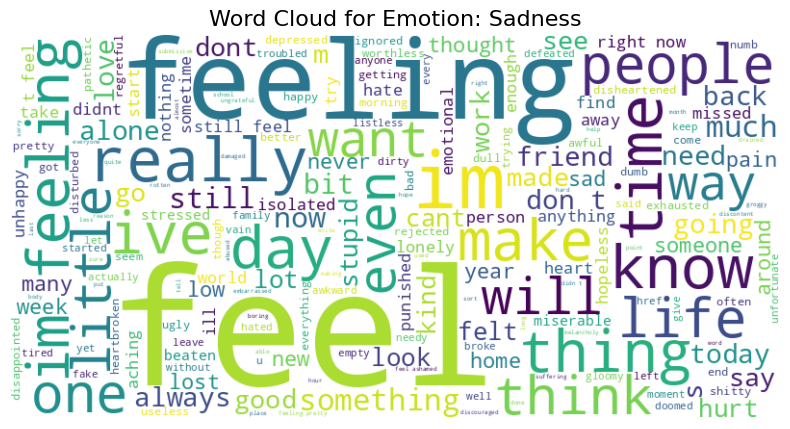

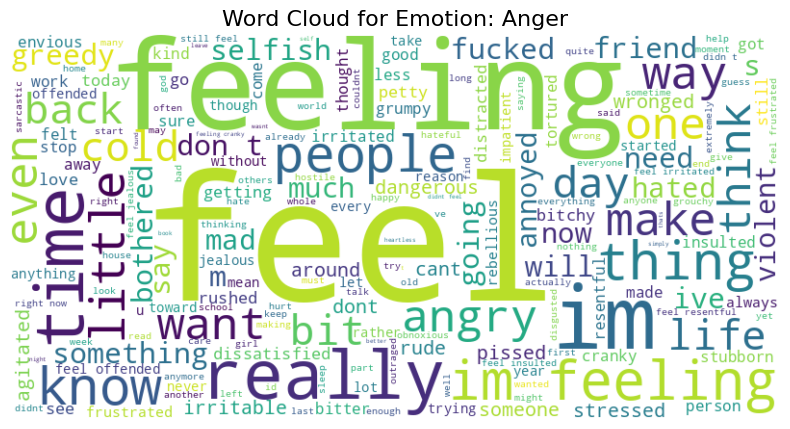

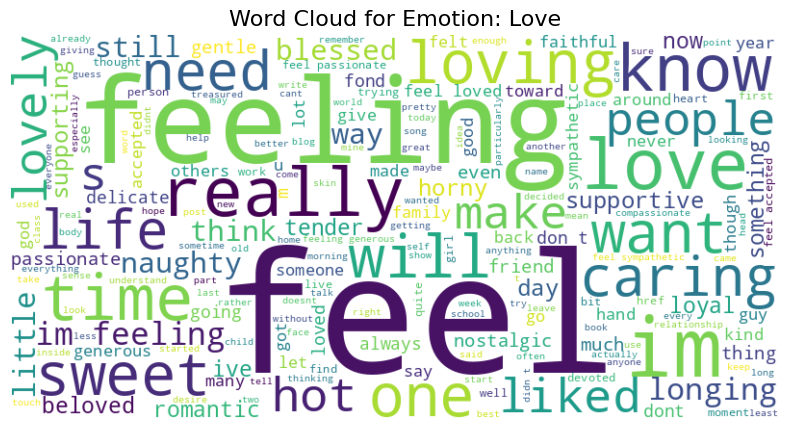

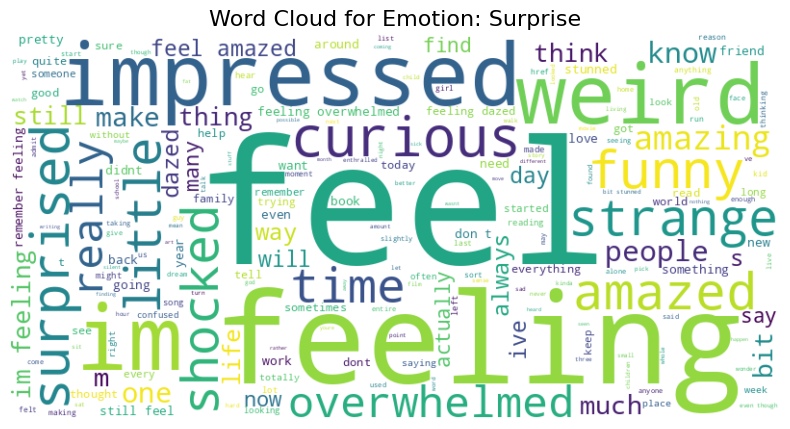

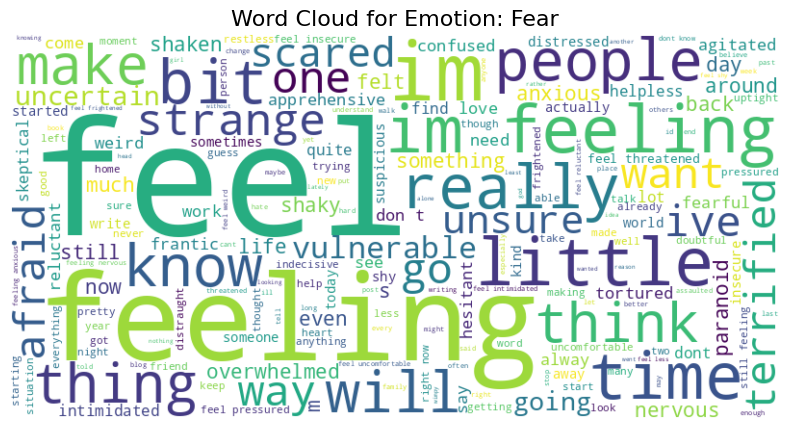

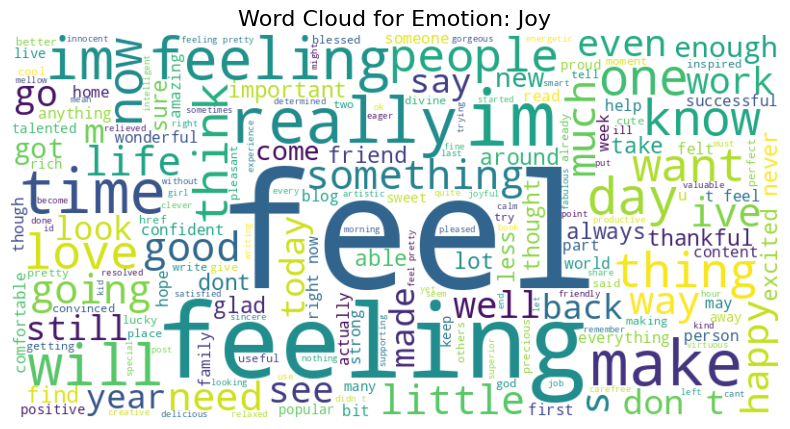

In [ ]:
# Install WordCloud if not already installed
# !pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_word_cloud(data, emotion, title):
    # Filter data for the specific emotion
    text = " ".join(data[data['emotion'] == emotion]['text'])
    # print(text,end=',')
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds for each emotion
emotions = train_data['emotion'].unique()

for emotion in emotions:
    generate_word_cloud(train_data, emotion, title=f"Word Cloud for Emotion: {emotion.capitalize()}")


In [ ]:
# Define Model Architectures
def build_rnn(vocab_size, embedding_dim, input_length):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=input_length),
        tf.keras.layers.SimpleRNN(64, return_sequences=False),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
def build_lstm(vocab_size, embedding_dim, input_length):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=input_length),
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
def build_bilstm(vocab_size, embedding_dim, input_length):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=input_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# Hyperparameters
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
print(tokenizer.word_index)
embedding_dim = 100
input_length = train_sequences.shape[1]
print(input_length)
print(train_sequences)

15214
{'<OOV>': 1, 'i': 2, 'feel': 3, 'and': 4, 'to': 5, 'the': 6, 'a': 7, 'feeling': 8, 'that': 9, 'of': 10, 'my': 11, 'in': 12, 'it': 13, 'like': 14, 'so': 15, 'for': 16, 'im': 17, 'me': 18, 'but': 19, 'was': 20, 'have': 21, 'is': 22, 'this': 23, 'am': 24, 'with': 25, 'not': 26, 'about': 27, 'be': 28, 'as': 29, 'on': 30, 'you': 31, 'just': 32, 'at': 33, 'when': 34, 'or': 35, 'all': 36, 'because': 37, 'more': 38, 'do': 39, 'can': 40, 'really': 41, 'up': 42, 't': 43, 'are': 44, 'by': 45, 'very': 46, 'know': 47, 'been': 48, 'if': 49, 'out': 50, 'myself': 51, 'time': 52, 'how': 53, 'what': 54, 'get': 55, 'little': 56, 'had': 57, 'now': 58, 'will': 59, 'from': 60, 'being': 61, 'they': 62, 'people': 63, 'them': 64, 'would': 65, 'he': 66, 'want': 67, 'her': 68, 'some': 69, 'think': 70, 'one': 71, 'still': 72, 'ive': 73, 'him': 74, 'even': 75, 'who': 76, 'an': 77, 'life': 78, 'its': 79, 'make': 80, 'there': 81, 'we': 82, 'bit': 83, 'something': 84, 'love': 85, 'much': 86, 'going': 87, 'dont'

In [ ]:
# Compile and Train
def compile_and_train(model, train_data, train_labels, val_data, val_labels, epochs=10):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        train_data, train_labels,
        validation_data=(val_data, val_labels),
        epochs=epochs,
        batch_size=40
    )
    return history

In [ ]:
# # Models
# models = {
#     "RNN": build_rnn(vocab_size, embedding_dim, input_length),
#     "LSTM": build_lstm(vocab_size, embedding_dim, input_length),
#     "BiLSTM": build_bilstm(vocab_size, embedding_dim, input_length)
# }

# for name, model in models.items():
#     print(f"Training {name} model...")
#     compile_and_train(model, train_sequences, train_labels, val_sequences, val_labels)


In [ ]:
# Function to preprocess and predict emotions for sample data
def predict_emotion(sample_texts, model, tokenizer, label_encoder, max_length=50):
    # Preprocess the text
    sequences = tokenizer.texts_to_sequences(sample_texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
    # Predict
    predictions = model.predict(padded_sequences)
    predicted_labels = np.argmax(predictions, axis=1)
    decoded_labels = label_encoder.inverse_transform(predicted_labels)
    return decoded_labels

# Sample Data
sample_data = [
    "I feel so happy today!",
    "I am very angry and upset about the situation.",
    "Feeling extremely sad and hopeless.",
    "I am in love and everything feels perfect."
]

# Choose a model (RNN, LSTM, or BiLSTM)
selected_model = models["BiLSTM"]  # Replace "BiLSTM" with "RNN" or "LSTM" as needed

# Predict emotions
predicted_emotions = predict_emotion(sample_data, selected_model, tokenizer, label_encoder)

# Display Results
for text, emotion in zip(sample_data, predicted_emotions):
    print(f"Text: {text} --> Predicted Emotion: {emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Text: I feel so happy today! --> Predicted Emotion: joy
Text: I am very angry and upset about the situation. --> Predicted Emotion: anger
Text: Feeling extremely sad and hopeless. --> Predicted Emotion: sadness
Text: I am in love and everything feels perfect. --> Predicted Emotion: joy
